___
# Ciência dos Dados - PROJETO 1

## Juan Jorge Garcia - 2B
___

## Análise socioeconômica das Regiões Brasileiras e o Acesso a Tecnologia

___
## Introdução

Esse projeto tem o objetivo de explorar a população brasileira nas diferentes regiões, analisando como é o perfil socioeconômico médio de um indivíduo em cada região, sua renda e área onde mora (urbana ou rural), comparando, ainda, os dados dos anos de 2013 e 2015.É importante também o estudo da influencia desses aspectos nas relações tecnológicas do indivíduo com a internet e celular (3G, banda larga, discada). Afim de equacionar essas variáveis e, desta forma, encontrar oportunidades de investimento para empresas que trabalham no ramo de telecomunicações.



___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\JUAN\Documents\GitHub\CD\Projeto 01


In [3]:
dados2015=pd.read_table("PNAD DOM2015\\DOM2015csv\\DOM2015.csv", encoding="windows-1252", sep=",")
dados2013=pd.read_table("filtrado2013.csv", encoding="windows-1252", sep=",")

Separando os domicílios por região:

In [4]:
dados2015.shape
dados2015.loc[(dados2015.UF>10)&(dados2015.UF<20),"REGIAO"] = "Norte"
dados2015.loc[(dados2015.UF>20)&(dados2015.UF<30),"REGIAO"] = "Nordeste"
dados2015.loc[(dados2015.UF>40)&(dados2015.UF<44),"REGIAO"] = "Sul"
dados2015.loc[(dados2015.UF>30)&(dados2015.UF<35),"REGIAO"] = "Sudeste"
dados2015.loc[(dados2015.UF>49)&(dados2015.UF<54),"REGIAO"] = "Centro-Oeste"

Criando um filtro para regiões urbanas e rurais:

In [5]:
dados2015.loc[(dados2015.V4105>=1)&(dados2015.V4105<=3),"URBANIZACAO"] = "Urbana"
dados2015.loc[(dados2015.V4105>3)&(dados2015.V4105<=8),"URBANIZACAO"] = "Rural"

Criando um filtro para rendimento mensal domiciliar em salários mínimos:

In [6]:
dados2015 = dados2015.rename(columns = {"V4614":"RENDA"})
dados2015.loc[(dados2015.RENDA>=1)&(dados2015.RENDA<=(937*(1/2))),"SALARIOS MINIMOS"] = "Até 1/2 salarios"
dados2015.loc[(dados2015.RENDA>(937*(1/2)))&(dados2015.RENDA<=937),"SALARIOS MINIMOS"] = "Entre 1/2 e 1 salario"
dados2015.loc[(dados2015.RENDA>937)&(dados2015.RENDA<=937*2),"SALARIOS MINIMOS"] = "Entre 1 e 2 salarios"
dados2015.loc[(dados2015.RENDA>937*2)&(dados2015.RENDA<=937*3),"SALARIOS MINIMOS"] = "Entre 2 e 3 salarios"
dados2015.loc[(dados2015.RENDA>937*3)&(dados2015.RENDA<=937*5),"SALARIOS MINIMOS"] = "Entre 3 e 5 salarios"
dados2015.loc[(dados2015.RENDA>937*5)&(dados2015.RENDA<=937*10),"SALARIOS MINIMOS"] = "Entre 5 e 10 salarios"
dados2015.loc[(dados2015.RENDA>937*10),"SALARIOS MINIMOS"] = "Mais que 10 salarios"

Criando um filtro parar pessoas que tem acesso a internet no próprio domicílio:

In [7]:
dados2015.loc[(dados2015.V02322 == 2),"ACESSO A INTERNET"] = "Sim"
dados2015.loc[(dados2015.V02322 == 4),"ACESSO A INTERNET"] = "Nao"

Criando um filtro para o tipo de acesso á internet:

In [8]:
dados2015.loc[(dados2015.V02426 == 4),"BANDA LARGA"] = "Nao"
dados2015.loc[(dados2015.V02425 == 4),"CONEXAO DISCADA"] = "Nao"
dados2015.loc[(dados2015.V02424 == 4),"3G"] = "Nao"
dados2015.loc[(dados2015.V02426 == 2),"BANDA LARGA"] = "Sim"
dados2015.loc[(dados2015.V02425 == 2),"CONEXAO DISCADA"] = "Sim"
dados2015.loc[(dados2015.V02424 == 2),"3G"] = "Sim"

Criando um filtro para as pessoas que tem acesso a celular no próprio domicílio:

In [9]:
dados2015.loc[(dados2015.V0220 == 2),"ACESSO A CELULAR"] = "Sim"
dados2015.loc[(dados2015.V0220 == 4),"ACESSO A CELULAR"] = "Nao"

In [10]:
dados_interesse = dados2015.loc[:, ["REGIAO","URBANIZACAO","RENDA","SALARIOS MINIMOS",
                                    "ACESSO A INTERNET","ACESSO A CELULAR","CONEXAO DISCADA","BANDA LARGA","3G"]]

In [11]:
dados_interesse.head(10)

,REGIAO,URBANIZACAO,RENDA,SALARIOS MINIMOS,ACESSO A INTERNET,ACESSO A CELULAR,CONEXAO DISCADA,BANDA LARGA,3G
0,Norte,Urbana,800.0,Entre 1/2 e 1 salario,Nao,Sim,NaN,NaN,NaN
1,Norte,Urbana,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Norte,Urbana,1150.0,Entre 1 e 2 salarios,Sim,Sim,Nao,Sim,Sim
3,Norte,Urbana,4760.0,Entre 5 e 10 salarios,Sim,Sim,Nao,Sim,Sim
4,Norte,Urbana,5800.0,Entre 5 e 10 salarios,Nao,Sim,NaN,NaN,NaN
5,Norte,Urbana,1990.0,Entre 2 e 3 salarios,Sim,Nao,Nao,Sim,Nao
6,Norte,Urbana,700.0,Entre 1/2 e 1 salario,Nao,Sim,NaN,NaN,NaN
7,Norte,Urbana,4000.0,Entre 3 e 5 salarios,Nao,Sim,NaN,NaN,NaN
8,Norte,Urbana,4090.0,Entre 3 e 5 salarios,Sim,Sim,Nao,Sim,Sim
9,Norte,Urbana,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Retirando os dados invalidos do data frame:

In [30]:
dados_interesse = dados_interesse[pd.notnull(dados_interesse['ACESSO A INTERNET'])][pd.notnull(dados_interesse['RENDA'])]

#quem nao tem internet fica com NaN nas perguntas sobre como acessa a intenet

In [13]:
print("Describe da renda de 2015\n",dados_interesse.RENDA.describe())

Describe da renda de 2015
 count    1.176010e+05
mean     1.960018e+10
std      1.386224e+11
min      0.000000e+00
25%      1.100000e+03
50%      2.000000e+03
75%      3.689000e+03
max      1.000000e+12
Name: RENDA, dtype: float64


Existem valores muito altos de renda para poquíssimos indivíduos, fazendo com que as medidas como média e desvio padrão fugirem
muito de seus valores, assim, essas medidas passam a não descrever mais a população em geral perdendo, então, seu objetivo. Para que se tenha uma melhor compreensão do brasileiro, é necessário a exclusão desses valores.


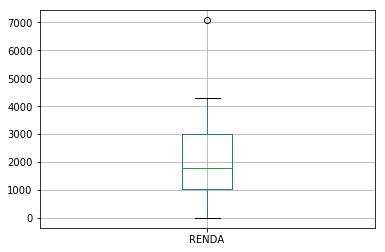

In [14]:
quantils=dados_interesse.RENDA.quantile(np.arange(0,1,.1))
quantils.plot(kind="box",grid=True)

Retirado a parte que não representa a população (os 10% mais ricos), tem-se uma melhor análise de dados.

Separando a renda em faixas iguais (levado em conta o salário mínimo atual) para podermos obter uma melhor análise:

(0, 937]        20.779185
(937, 1874]     29.120495
(1874, 2811]    20.117439
(2811, 3748]    10.995656
(3748, 4685]     7.058315
(4685, 5622]     4.548467
(5622, 6559]     2.887199
(6559, 7496]     1.827854
(7496, 8433]     1.621691
(8433, 9370]     1.043699
Name: RENDA, dtype: float64

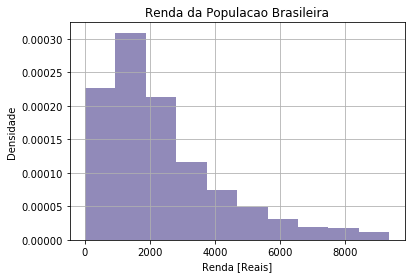

In [15]:
faixa = np.arange(0,10000,937)
sal_min = pd.cut(dados_interesse.RENDA,faixa)
plot = dados_interesse.RENDA.plot.hist(bins=faixa,title="Renda da Populacao Brasileira", normed = 1,
                                       color="darkslateblue",alpha=0.6)
plt.xlabel("Renda [Reais]")
plt.ylabel("Densidade")
plt.grid(True)
sal_min.value_counts(sort=False, normalize=True)*100

Esse gráfico deixa claro onde está as rendas que representam melhor a população brasileira __(entre 0 e 5000 reais)__, a partir disso,
a porcentagem  da população representada é infima. Temos mais de 50% da população brasileira ganhando entre 2 salários mínimos
(até 1900 reais) por exemplo.


## Comparando os aspectos socioeconômicos de cada região:

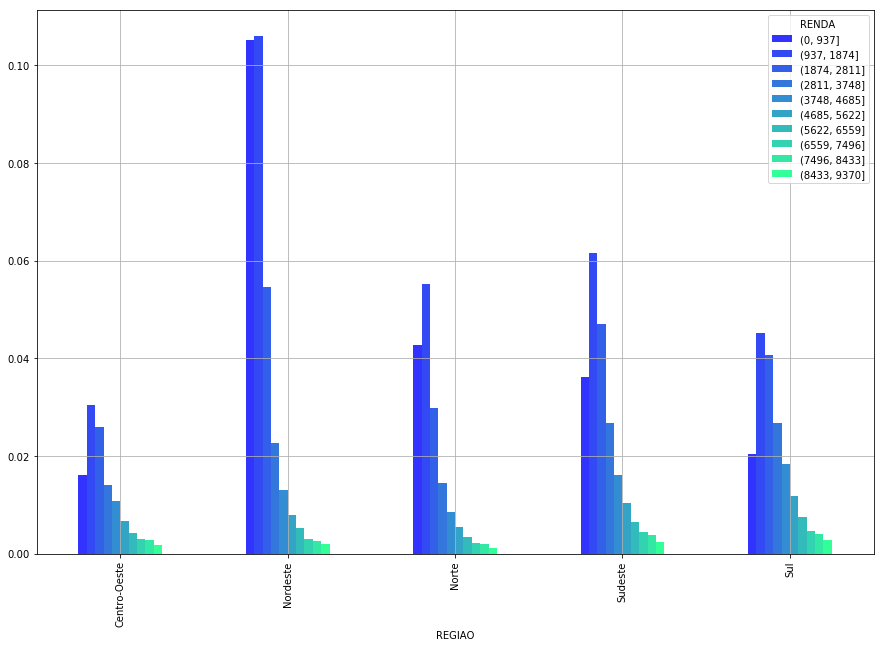

In [16]:
sal_min.value_counts()
sal_reg=pd.crosstab(dados_interesse["REGIAO"],sal_min,normalize = True)
sal_reg.plot(kind="bar",figsize=(15,10), colormap="winter",alpha=0.8, grid= True)

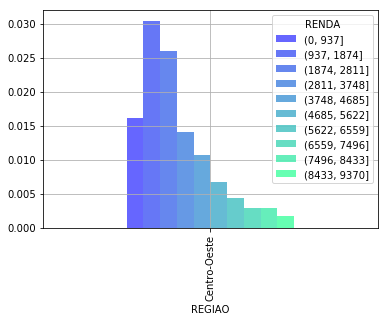

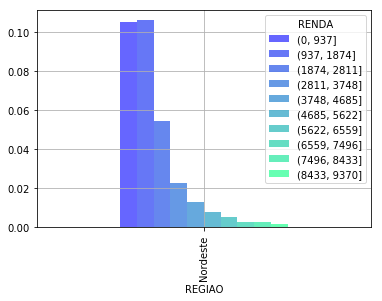

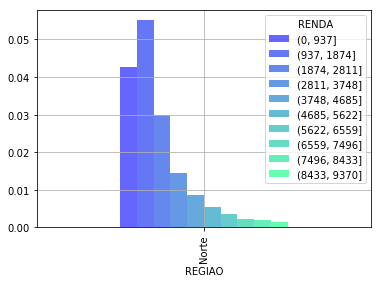

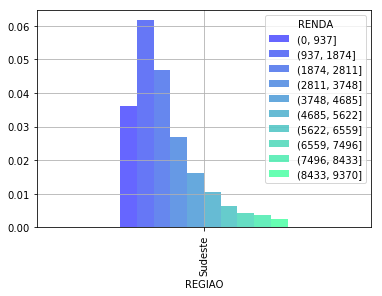

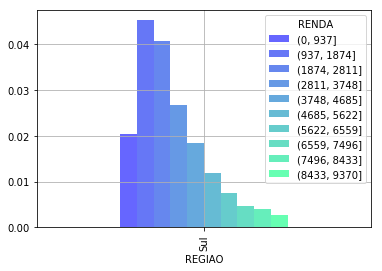

In [17]:
for i in range(5):
    sal_reg[i:i+1].plot(kind="bar",grid = True, colormap ="winter",alpha=0.6)
    

Grande parte da região Nordeste e Norte vive com menos de 3 salários mínimos, mas representam um __grande número da população__ 
brasileira, algo que pode nos representar um mercado comsumidor em potencial, principalmente para planos mais baratos.

Regiao Sul e sudeste são regioes mais ricas.

Regiao Sudeste possui uma grande população com uma renda média alta, podendo representar um mercado bom para planos 
mais caros (como uma maior velocidade de internet por exemplo ou planos de 4G).

In [18]:
sal_min.value_counts()
sal_net=pd.crosstab(dados_interesse["ACESSO A INTERNET"],sal_min,normalize = True)
b=sal_net.sum().sum()
sal_net*100/b

RENDA,"(0, 937]","(937, 1874]","(1874, 2811]","(2811, 3748]","(3748, 4685]","(4685, 5622]","(5622, 6559]","(6559, 7496]","(7496, 8433]","(8433, 9370]"
ACESSO A INTERNET,,,,,,,,,,
Nao,15.114310,16.180098,7.706255,2.943342,1.311527,0.602842,0.286235,0.179472,0.127011,0.075470
Sim,5.664875,12.940397,12.411184,8.052314,5.746788,3.945625,2.600965,1.648382,1.494680,0.968229


Vê-se que a partir de 3 salarios mínimos, mais da metade das pessoas possuem acesso à internet, com 2 salarios mínimos
vemos quase equiparado os que possuem internet com os que não possuem. Isso pode significar um mercado favorável para planos 
de inclusão digital, especialmente, para as pessoas dessa faixa, que parecem se interessar mais pela internet.

### Área Rural vs Área Urbana

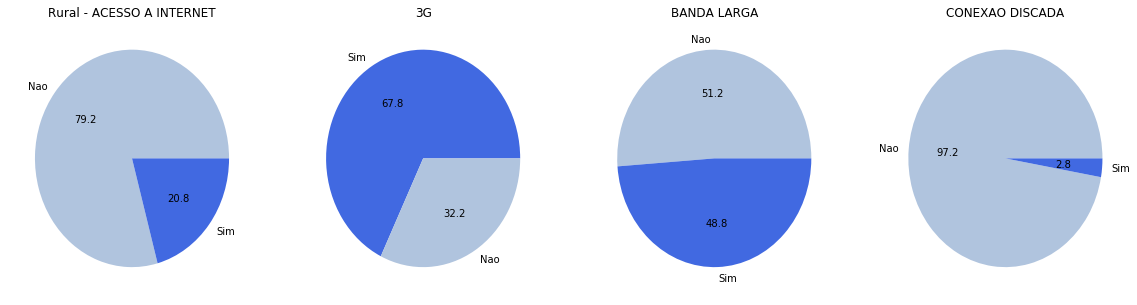

In [19]:
rural_net=(dados_interesse["ACESSO A INTERNET"])[dados_interesse.URBANIZACAO=="Rural"].value_counts()
rural_3G= (dados_interesse["3G"])[dados_interesse.URBANIZACAO=="Rural"].value_counts()
rural_bl= (dados_interesse["BANDA LARGA"])[dados_interesse.URBANIZACAO=="Rural"].value_counts()
rural_cd= (dados_interesse["CONEXAO DISCADA"])[dados_interesse.URBANIZACAO=="Rural"].value_counts()


f, axarr = plt.subplots(1,4,figsize=(20,5))
axarr[0].pie(rural_net,autopct="%0.1f",labels=rural_net.index,colors=["lightsteelblue","royalblue"])
axarr[0].set_title('Rural - ACESSO A INTERNET')


axarr[1].pie(rural_3G,autopct="%0.1f",labels=rural_3G.index,colors=["royalblue","lightsteelblue"])
axarr[1].set_title('3G')


axarr[2].pie(rural_bl,autopct="%0.1f",labels=rural_bl.index,colors=["lightsteelblue","royalblue"])
axarr[2].set_title('BANDA LARGA')


axarr[3].pie(rural_cd,autopct="%0.1f",labels=rural_cd.index,colors=["lightsteelblue","royalblue"])
axarr[3].set_title('CONEXAO DISCADA')


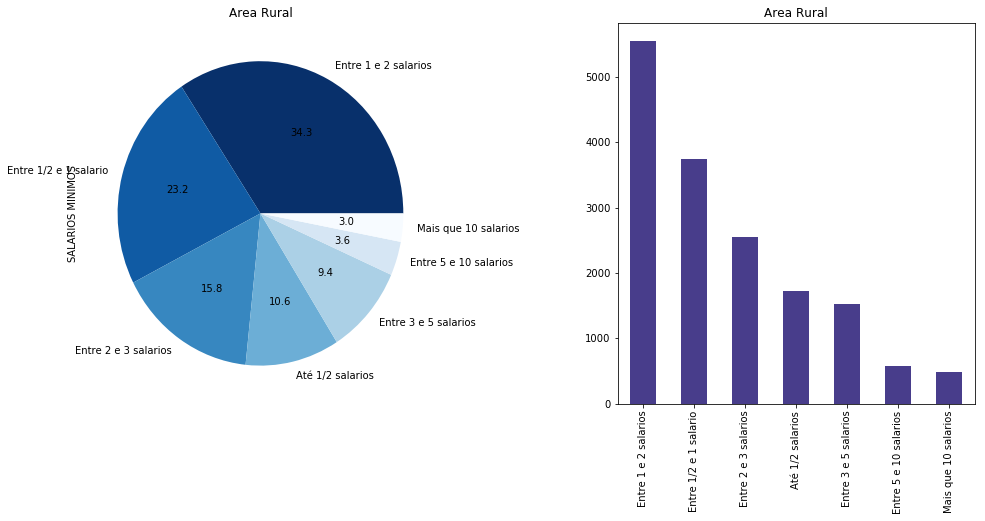

In [20]:
rural_sal=(dados_interesse["SALARIOS MINIMOS"])[dados_interesse.URBANIZACAO=="Rural"].value_counts()
fig = plt.figure(figsize=(16,7))

plt.subplot(122)
plot=rural_sal.plot(kind="bar", title= "Area Rural", color="darkslateblue")

plt.subplot(121)
plot=rural_sal.plot(kind="pie",autopct="%0.1f", title= "Area Rural", colormap="Blues_r")

fig.subplots_adjust(wspace=.5)
plt.show()

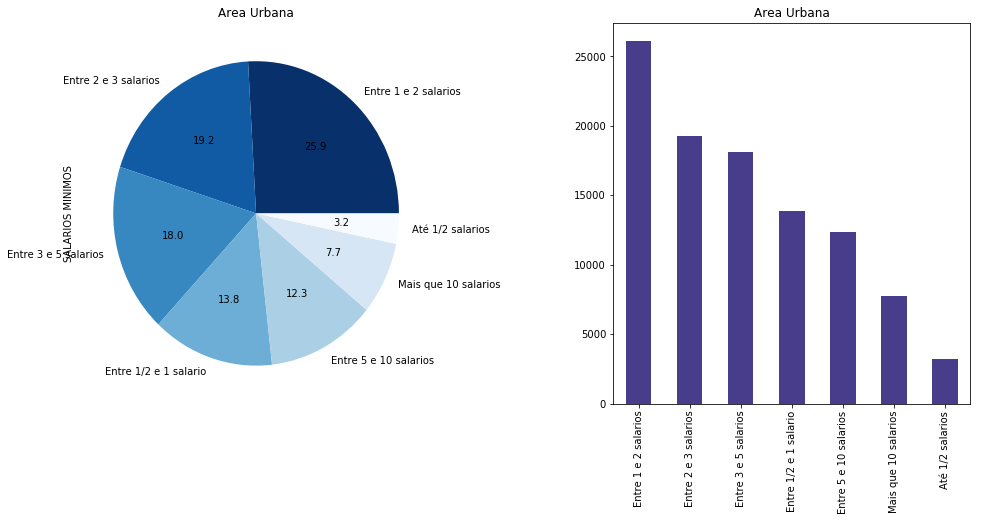

In [21]:
urb_sal=(dados_interesse["SALARIOS MINIMOS"])[dados_interesse.URBANIZACAO=="Urbana"].value_counts()
fig = plt.figure(figsize=(16,7))

plt.subplot(122)
plot=urb_sal.plot(kind="bar", title= "Area Urbana", color="darkslateblue")

plt.subplot(121)
plot=urb_sal.plot(kind="pie",autopct="%0.1f", title= "Area Urbana", colormap="Blues_r")

fig.subplots_adjust(wspace=.5)
plt.show()

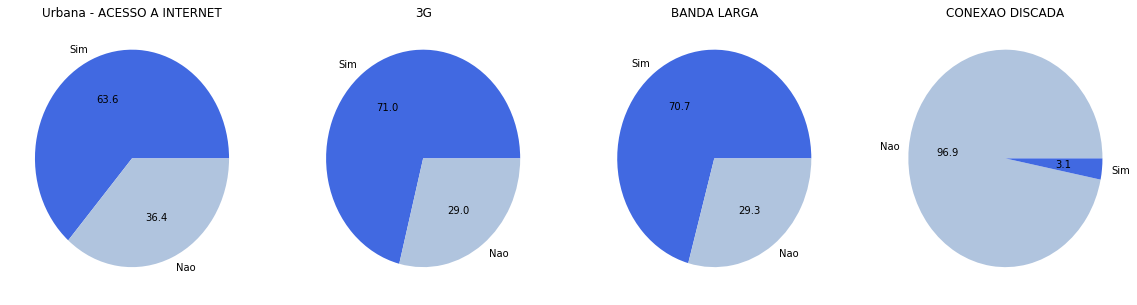

In [22]:
urb_net=(dados_interesse["ACESSO A INTERNET"])[dados_interesse.URBANIZACAO=="Urbana"].value_counts()
urb_3G= (dados_interesse["3G"])[dados_interesse.URBANIZACAO=="Urbana"].value_counts()
urb_bl= (dados_interesse["BANDA LARGA"])[dados_interesse.URBANIZACAO=="Urbana"].value_counts()
urb_cd= (dados_interesse["CONEXAO DISCADA"])[dados_interesse.URBANIZACAO=="Urbana"].value_counts()


f, axarr = plt.subplots(1,4,figsize=(20,5))
axarr[0].pie(urb_net,autopct="%0.1f",labels=urb_net.index,colors=["royalblue","lightsteelblue"])
axarr[0].set_title('Urbana - ACESSO A INTERNET')


axarr[1].pie(urb_3G,autopct="%0.1f",labels=urb_3G.index,colors=["royalblue","lightsteelblue"])
axarr[1].set_title('3G')


axarr[2].pie(urb_bl,autopct="%0.1f",labels=urb_bl.index,colors=["royalblue","lightsteelblue"])
axarr[2].set_title('BANDA LARGA')


axarr[3].pie(urb_cd,autopct="%0.1f",labels=urb_cd.index,colors=["lightsteelblue","royalblue"])
axarr[3].set_title('CONEXAO DISCADA')

Esses gráficos mostram que __a grande maioria da população rural brasileira não tem acesso a internet (80%)__, enquanto boa parte da populacao urbana tem acesso(60%).Essa discrepância pode ser explicada analisando a renda de cada região, percebe-se, entao, que __a renda média da área urbana é maior do que a rural__, outro motivo que pode influenciar nessa situação é a diferença de escolaridade e de infraestrutura, uma de varias fontes que mostram essa situação: http://especiais.g1.globo.com/educacao/2015/censo-escolar-2014/brasil-urbano-x-brasil-rural.html


__Grande parte da população rural que acessa a internet usa o 3G como meio__, pelos dados acredita-se que a forma mais eficaz
de aumentar o acesso à internet dessa regiao (precisa de menos infraestrutura), seria por planos de 3G mais baratos (podendo reduzir a velocidade e o tamanho de pacotes de dados)
Enquanto a população urbana vemos grande equilibrio entre 3G e banda larga.
Curiosamente, percebe-se, que a conexão discada caiu em desuso em nosso pais (para a alegria de muitos)!

### Acesso a Celular:

A porcentagem de brasileiros que usa celular é de:  91.7075535072 %


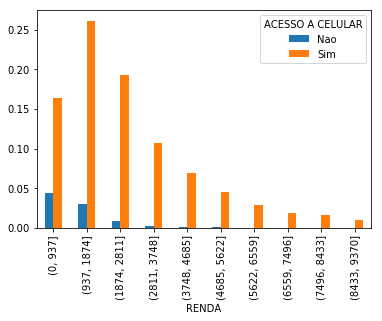

In [23]:
sal_cel=pd.crosstab(sal_min,dados_interesse["ACESSO A CELULAR"],normalize = True)
sal_cel.plot(kind="bar")

x=dados_interesse["ACESSO A CELULAR"].value_counts()
b=x.sum()
print("A porcentagem de brasileiros que usa celular é de: ",(100*x[0]/x.sum()),"%")

Mais de __91%__ da população brasileira possui celular, sendo assim __o mercado de 3G e 4G no brasil possui um enorme potencial.__

### Região Norte:

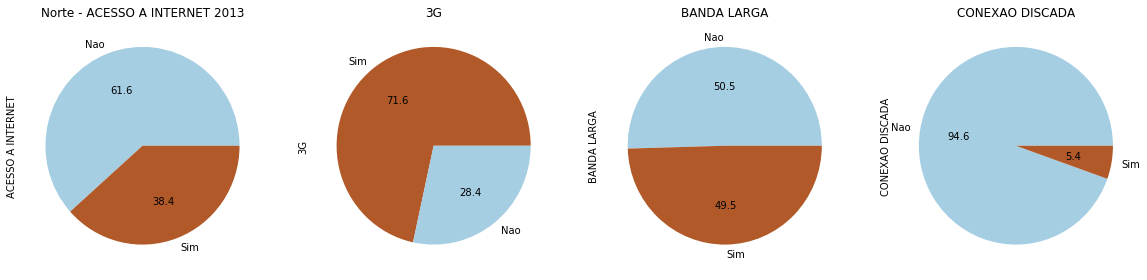

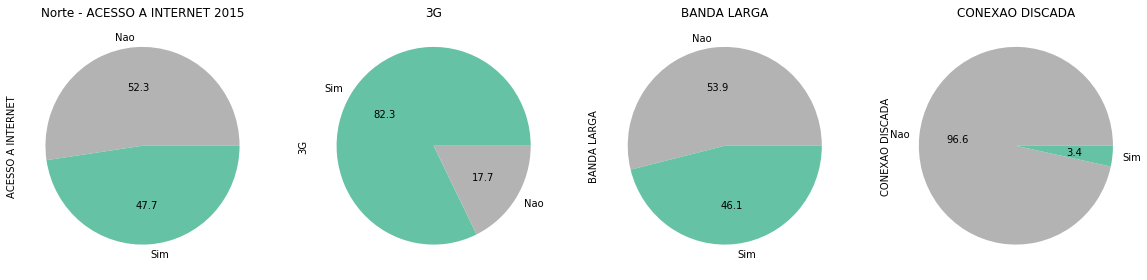

In [24]:
#tive que plotar separado os graficos pois plotar graficos de cada regiao em um for travava
norte2013=dados2013[dados2013.REGIAO=="Norte"]
norte2015=dados_interesse[dados_interesse.REGIAO=="Norte"]
net_nort= (dados_interesse["ACESSO A INTERNET"])[dados_interesse.REGIAO=="Norte"].value_counts()
nort_3G= (dados_interesse["3G"])[dados_interesse.REGIAO=="Norte"].value_counts()
nort_bl= (dados_interesse["BANDA LARGA"])[dados_interesse.REGIAO=="Norte"].value_counts()
nort_cd= (dados_interesse["CONEXAO DISCADA"])[dados_interesse.REGIAO=="Norte"].value_counts()

net_nort2013= (dados2013["ACESSO A INTERNET"])[dados2013.REGIAO=="Norte"].value_counts()
nort2013_3G= (dados2013["3G"])[dados2013.REGIAO=="Norte"].value_counts()
nort2013_bl= (dados2013["BANDA LARGA"])[dados2013.REGIAO=="Norte"].value_counts()
nort2013_cd= (dados2013["CONEXAO DISCADA"])[dados2013.REGIAO=="Norte"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=net_nort2013.plot(kind="pie", autopct="%0.1f",title= 'Norte - ACESSO A INTERNET 2013', colormap="Paired")

plt.subplot(242)
plot=nort2013_3G.plot(kind="pie",autopct="%0.1f", title= "3G", colormap="Paired_r")


plt.subplot(243)
plot=nort2013_bl.plot(kind="pie",autopct="%0.1f", title= "BANDA LARGA", colormap="Paired")

plt.subplot(244)
plot=nort2013_cd.plot(kind="pie",autopct="%0.1f", title= "CONEXAO DISCADA", colormap="Paired")
plt.show()


fig.subplots_adjust(hspace=.5,wspace=.5)
plt.show()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=net_nort.plot(kind="pie", autopct="%0.1f",title= 'Norte - ACESSO A INTERNET 2015', colormap="Set2_r")

plt.subplot(242)
plot=nort_3G.plot(kind="pie",autopct="%0.1f", title= "3G", colormap="Set2")


plt.subplot(243)
plot=nort_bl.plot(kind="pie",autopct="%0.1f", title= "BANDA LARGA", colormap="Set2_r")

plt.subplot(244)
plot=nort_cd.plot(kind="pie",autopct="%0.1f", title= "CONEXAO DISCADA", colormap="Set2_r")
plt.show()


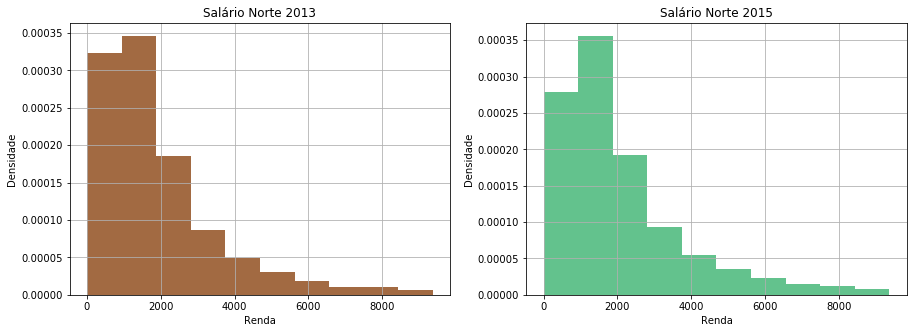

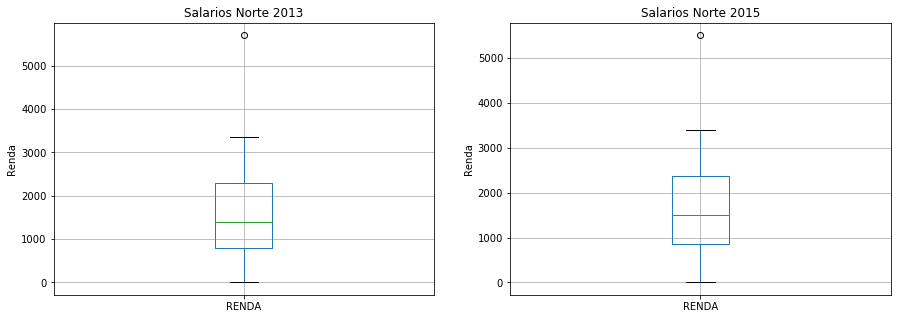

In [25]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=norte2013.RENDA.hist(bins=faixa,normed=1,alpha=0.8,color="saddlebrown")
plt.title("Salário Norte 2013")
plt.ylabel("Densidade")
plt.xlabel("Renda")

plt.subplot(122)
plot=norte2015.RENDA.hist(bins=faixa,normed=1,alpha=0.8,color="mediumseagreen")
plt.title("Salário Norte 2015")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

sal_norte2015 = norte2015.RENDA.quantile(np.arange(0,1,.1))
sal_norte2013 = norte2013.RENDA.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(121)
sal_norte2013.plot(kind="box",grid=True)
plt.title("Salarios Norte 2013")
plt.ylabel("Renda")

plt.subplot(122)
sal_norte2015.plot(kind="box",grid=True)
plt.title("Salarios Norte 2015")
plt.ylabel("Renda")

plt.show()


De acordo com esses dados, a empresa de telecomunicação que deseja expandir suas vendas para região norte, __pode ter sucesso
concentrando suas vendas de planos para o serviço de 3G__, pois, dos 47% que acessam internet, 82% acessam por 3G, 
mostrando a preferencia da regiao por esse tipo de serviço. A empresa deve concentrar-se na captação de novos clientes que ainda
não tenham acesso a internet (52% da população).

Analisando a evolução do estado Norte, é notório o aumento no acesso a internet (quase 10% em apenas 2 anos), vemos tambem que __um dos maiores responsáveis por esse crescimento foi o serviço de 3G__, sendo que a renda da região não se diferencia muito ,o que corrobora a tese acima (embora o serviço de banda larga também tenha crescido porcentualmente).


### Nordeste:

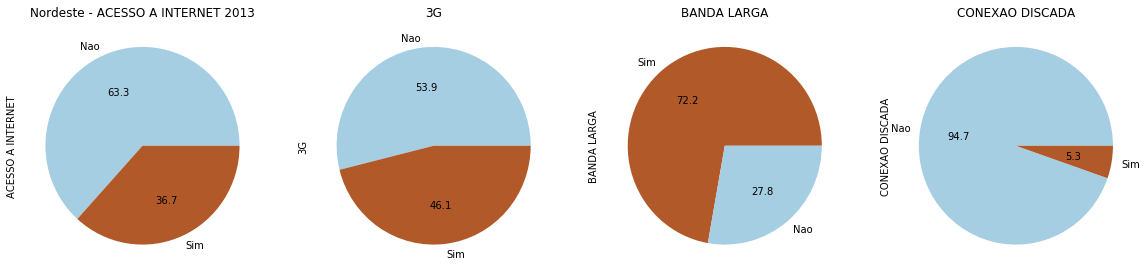

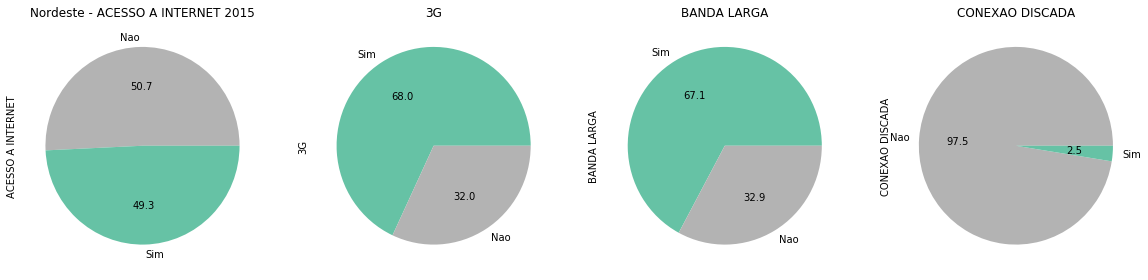

In [26]:
#tive que plotar separado os graficos pois plotar graficos de cada regiao em um for travava
nord2013=dados2013[dados2013.REGIAO=="Nordeste"]
nord2015=dados_interesse[dados_interesse.REGIAO=="Nordeste"]
net_nord= (dados_interesse["ACESSO A INTERNET"])[dados_interesse.REGIAO=="Nordeste"].value_counts()
nord_3G= (dados_interesse["3G"])[dados_interesse.REGIAO=="Nordeste"].value_counts()
nord_bl= (dados_interesse["BANDA LARGA"])[dados_interesse.REGIAO=="Nordeste"].value_counts()
nord_cd= (dados_interesse["CONEXAO DISCADA"])[dados_interesse.REGIAO=="Nordeste"].value_counts()


net_nord2013= (dados2013["ACESSO A INTERNET"])[dados2013.REGIAO=="Nordeste"].value_counts()
nord2013_3G= (dados2013["3G"])[dados2013.REGIAO=="Nordeste"].value_counts()
nord2013_bl= (dados2013["BANDA LARGA"])[dados2013.REGIAO=="Nordeste"].value_counts()
nord2013_cd= (dados2013["CONEXAO DISCADA"])[dados2013.REGIAO=="Nordeste"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=net_nord2013.plot(kind="pie", autopct="%0.1f",title= 'Nordeste - ACESSO A INTERNET 2013', colormap="Paired")

plt.subplot(242)
plot=nord2013_3G.plot(kind="pie",autopct="%0.1f", title= "3G", colormap="Paired")


plt.subplot(243)
plot=nord2013_bl.plot(kind="pie",autopct="%0.1f", title= "BANDA LARGA", colormap="Paired_r")

plt.subplot(244)
plot=nord2013_cd.plot(kind="pie",autopct="%0.1f", title= "CONEXAO DISCADA", colormap="Paired")
plt.show()


fig.subplots_adjust(hspace=.5,wspace=.5)
plt.show()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=net_nord.plot(kind="pie", autopct="%0.1f",title= 'Nordeste - ACESSO A INTERNET 2015', colormap="Set2_r")

plt.subplot(242)
plot=nord_3G.plot(kind="pie",autopct="%0.1f", title= "3G", colormap="Set2")


plt.subplot(243)
plot=nord_bl.plot(kind="pie",autopct="%0.1f", title= "BANDA LARGA", colormap="Set2")

plt.subplot(244)
plot=nord_cd.plot(kind="pie",autopct="%0.1f", title= "CONEXAO DISCADA", colormap="Set2_r")
plt.show()


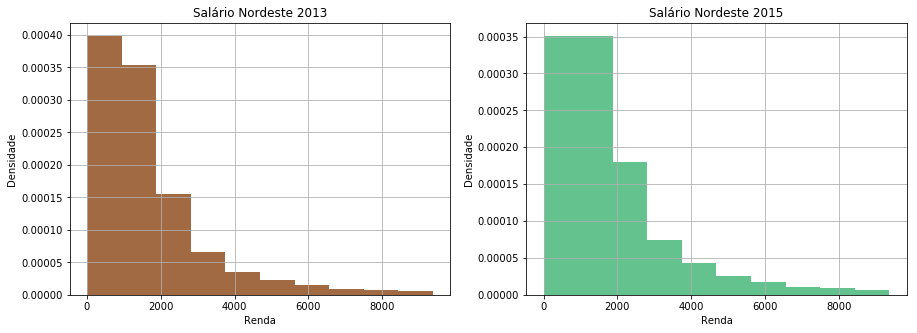

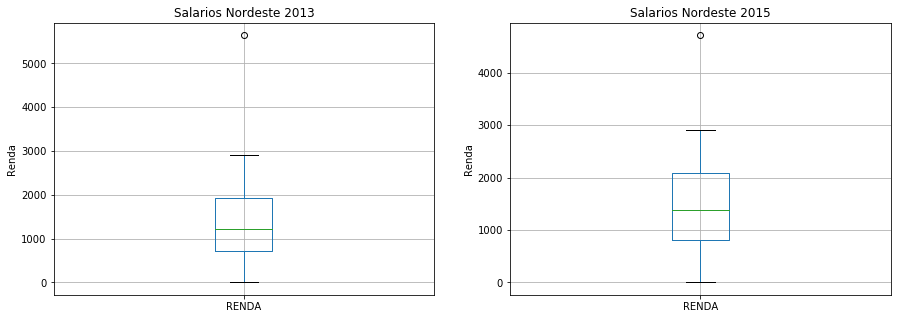

count      10.000000
mean     1655.330000
std      1629.817931
min         0.000000
25%       713.000000
50%      1223.000000
75%      1937.500000
max      5639.300000
Name: RENDA, dtype: float64
count      10.000000
mean     1649.920000
std      1367.022627
min         0.000000
25%       816.000000
50%      1382.000000
75%      2083.750000
max      4712.200000
Name: RENDA, dtype: float64


In [27]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=nord2013.RENDA.hist(bins=faixa,normed=1,alpha=0.8,color="saddlebrown")
plt.title("Salário Nordeste 2013")
plt.ylabel("Densidade")
plt.xlabel("Renda")

plt.subplot(122)
plot=nord2015.RENDA.hist(bins=faixa,normed=1,alpha=0.8,color="mediumseagreen")
plt.title("Salário Nordeste 2015")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

sal_nord2015 = nord2015.RENDA.quantile(np.arange(0,1,.1))
sal_nord2013 = nord2013.RENDA.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(121)
sal_nord2013.plot(kind="box",grid=True)
plt.title("Salarios Nordeste 2013")
plt.ylabel("Renda")

plt.subplot(122)
sal_nord2015.plot(kind="box",grid=True)
plt.title("Salarios Nordeste 2015")
plt.ylabel("Renda")

plt.show()

print(sal_nord2013.describe())
print(sal_nord2015.describe())


Relacionando a evolução do estado Nordestino, percebe-se, também, um __aumento significativo no acesso à internet (mais de 10% em 2 anos)__, com um grande acréscimo percentual de usuários de 3G, porém, há,também, um aumento na renda do nordestino (embora a média tenha abaixado devido a outliers que não descrevem a população em geral), o que significa um poder de compra maior.Curiosamente, o acesso a internet feito por banda larga decresceu percentualmente.


No nordeste existe um grande mercado em potencial, devido a __população grande__, um grande número de pessoas que ainda não tem acesso a internet (o que pode significar um __mercado ainda não saturado__), e um __aumento no poder de compra__, a empresa pode investir em planos promocionais (básicos) conjuntos de 3G.

### Sudeste:

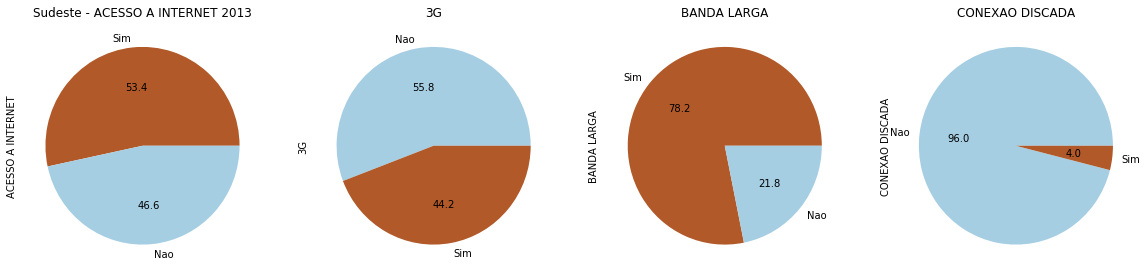

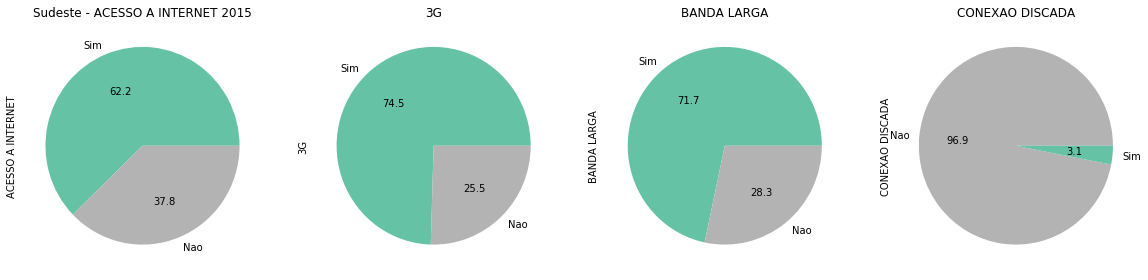

In [28]:
#tive que plotar separado os graficos pois plotar graficos de cada regiao em um for travava
sud2013=dados2013[dados2013.REGIAO=="Sudeste"]
sud2015=dados_interesse[dados_interesse.REGIAO=="Sudeste"]
net_sud= (dados_interesse["ACESSO A INTERNET"])[dados_interesse.REGIAO=="Sudeste"].value_counts()
sud_3G= (dados_interesse["3G"])[dados_interesse.REGIAO=="Sudeste"].value_counts()
sud_bl= (dados_interesse["BANDA LARGA"])[dados_interesse.REGIAO=="Sudeste"].value_counts()
sud_cd= (dados_interesse["CONEXAO DISCADA"])[dados_interesse.REGIAO=="Sudeste"].value_counts()


net_sud2013= (dados2013["ACESSO A INTERNET"])[dados2013.REGIAO=="Sudeste"].value_counts()
sud2013_3G= (dados2013["3G"])[dados2013.REGIAO=="Sudeste"].value_counts()
sud2013_bl= (dados2013["BANDA LARGA"])[dados2013.REGIAO=="Sudeste"].value_counts()
sud2013_cd= (dados2013["CONEXAO DISCADA"])[dados2013.REGIAO=="Sudeste"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=net_sud2013.plot(kind="pie", autopct="%0.1f",title= 'Sudeste - ACESSO A INTERNET 2013', colormap="Paired_r")

plt.subplot(242)
plot=sud2013_3G.plot(kind="pie",autopct="%0.1f", title= "3G", colormap="Paired")


plt.subplot(243)
plot=sud2013_bl.plot(kind="pie",autopct="%0.1f", title= "BANDA LARGA", colormap="Paired_r")

plt.subplot(244)
plot=sud2013_cd.plot(kind="pie",autopct="%0.1f", title= "CONEXAO DISCADA", colormap="Paired")
plt.show()


fig.subplots_adjust(hspace=.5,wspace=.5)
plt.show()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=net_sud.plot(kind="pie", autopct="%0.1f",title= 'Sudeste - ACESSO A INTERNET 2015', colormap="Set2")

plt.subplot(242)
plot=sud_3G.plot(kind="pie",autopct="%0.1f", title= "3G", colormap="Set2")


plt.subplot(243)
plot=sud_bl.plot(kind="pie",autopct="%0.1f", title= "BANDA LARGA", colormap="Set2")

plt.subplot(244)
plot=sud_cd.plot(kind="pie",autopct="%0.1f", title= "CONEXAO DISCADA", colormap="Set2_r")
plt.show()


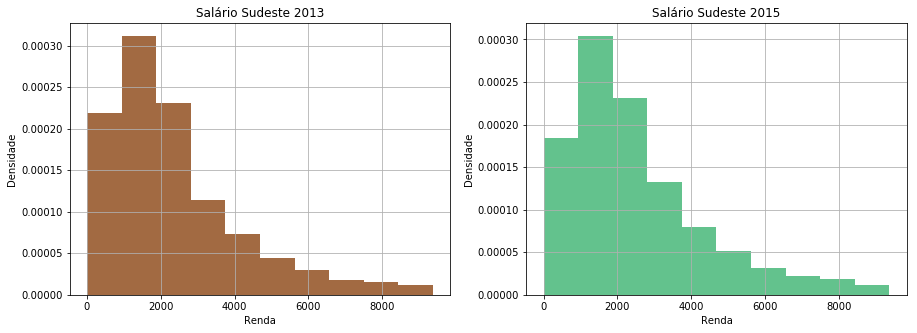

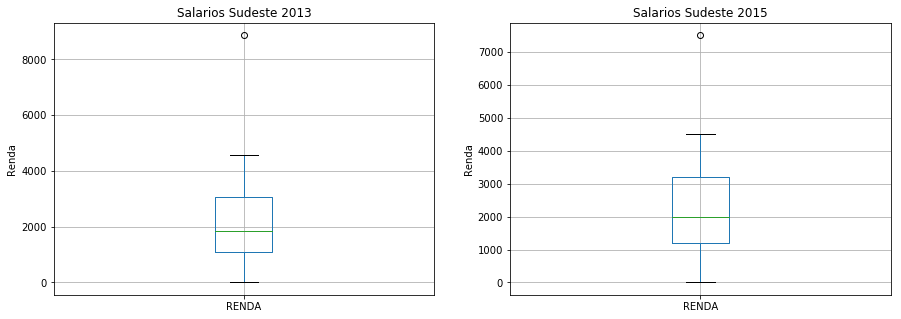

count      10.000000
mean     2592.700000
std      2565.551015
min         0.000000
25%      1089.000000
50%      1846.000000
75%      3081.250000
max      8860.000000
Name: RENDA, dtype: float64
count      10.000000
mean     2541.600000
std      2173.353333
min         0.000000
25%      1192.500000
50%      1994.000000
75%      3187.500000
max      7500.000000
Name: RENDA, dtype: float64


In [29]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=sud2013.RENDA.hist(bins=faixa,normed=1,alpha=0.8,color="saddlebrown")
plt.title("Salário Sudeste 2013")
plt.ylabel("Densidade")
plt.xlabel("Renda")

plt.subplot(122)
plot=sud2015.RENDA.hist(bins=faixa,normed=1,alpha=0.8,color="mediumseagreen")
plt.title("Salário Sudeste 2015")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

sal_sud2015 = sud2015.RENDA.quantile(np.arange(0,1,.1))
sal_sud2013 = sud2013.RENDA.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(121)
sal_sud2013.plot(kind="box",grid=True)
plt.title("Salarios Sudeste 2013")
plt.ylabel("Renda")

plt.subplot(122)
sal_sud2015.plot(kind="box",grid=True)
plt.title("Salarios Sudeste 2015")
plt.ylabel("Renda")

plt.show()

print(sal_sud2013.describe())
print(sal_sud2015.describe())


A região Sudeste, sendo __a região mais populosa e rica do país__, apresenta por si só um mercado enorme para empresas. Mas não deve-se negligenciar a concorrência entre empresas nessa região, o que pode diminuir a margem de lucro do empresariado.

No tempo de 2 anos, houve um aumento na receita do cidadão que reside no Sudeste (desconsiderando os outliers, pois estes nao representam a população), assim como um crescimento no acesso a internet. Vale ressaltar, também, __o grande salto no número de usuários de 3G nessa regiao (quase 20% em 2 anos)__.


___
## Conclusão 

Enfim, após feita as análises, é necessário evidenciar algumas partes relevantes do projeto.Foi escolhido os anos 2013 e 2015 por apresentarem a maior diferença de tempo e, ao mesmo tempo, não ocupar muito tempo na análise. De acordo com os dados, podemos concluir que __a conexão discada caiu em desuso e está obsoleta__. É notório também a __ascensão da tecnologia 3G e 4G ao redor de todas as áreas do país__, o que nos leva a pergunta do porque desse crescimento, seria por causa do "fácil acesso"(sendo que 91% da população tem acesso a celular)?, seria pelo preço mais barato?, precisaria de mais dados e longas análises para respodermos essa pergunta... Acredito que grande parte do objetivo desse projeto foi alcançado, apesar das "oportunidades de investimentos" encontradas estarem longe de serem certezas e verdades absolutas.